In [90]:
import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import sinc

plt.rcParams.update({'text.usetex': True,})
plt.rcParams['text.latex.preamble'] = r'\usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage{amsmath} \usepackage{siunitx}'

In [91]:
def fit_sinc(x, a, b):
    return a * np.abs(sinc(b*x/np.pi))


cm = 1/2.54 # matplotlib is stupid and uses inches instead of cm.

path = r'~/Documents/fp_2223/josephson_effect/files/'
data = []



In [92]:
i_v_b_table = np.loadtxt("files/I-V-B-table.csv", delimiter='\t', skiprows=1)
B_values = np.append(i_v_b_table[:,2], (i_v_b_table[1:,2])*-1)
#B_values = np.delete(B_values, 1)
print(B_values)

folder_name = 'files'
file_type = 'txt'

i_c = []
i_c_real = []
data_5_2 = {}
stepsize = 1e-6

files_5_2 = [file for file in glob.glob(folder_name + "/5,2_*."+file_type)]
files_5_2.sort()
print(files_5_2)

[ 0.      0.19    0.39    0.58    0.77    0.9639  1.1567  1.3495  1.54
  1.74    1.9278  2.1206  2.3134 -0.19   -0.39   -0.58   -0.77   -0.9639
 -1.1567 -1.3495 -1.54   -1.74   -1.9278 -2.1206 -2.3134]
['files/5,2_M01_0A.txt', 'files/5,2_M02_0,1A.txt', 'files/5,2_M03_0,21A.txt', 'files/5,2_M04_0,29A.txt', 'files/5,2_M05_0,4.txt', 'files/5,2_M06_0,5.txt', 'files/5,2_M07_0,6A.txt', 'files/5,2_M08_0,7A.txt', 'files/5,2_M09_0,8A.txt', 'files/5,2_M10_0,9A.txt', 'files/5,2_M11_1,0A.txt', 'files/5,2_M12_1,1A.txt', 'files/5,2_M13_1,2A.txt', 'files/5,2_M14_-0,1A.txt', 'files/5,2_M15_-0,2A.txt', 'files/5,2_M16_-0,3A.txt', 'files/5,2_M17_-0,4A.txt', 'files/5,2_M18_-0,5A.txt', 'files/5,2_M19_-0,58A.txt', 'files/5,2_M20_-0,7A.txt', 'files/5,2_M21_-0,8A.txt', 'files/5,2_M22_-0,9A.txt', 'files/5,2_M23_-1,0A.txt', 'files/5,2_M24_-1,1A.txt', 'files/5,2_M25_-1,2A.txt']


In [93]:
i_c = []
i_c_real = []
for file in files_5_2:
    workinonit = np.loadtxt(file, delimiter='\t', skiprows=1)*1e3
    newdiff = [u - workinonit[201,0] for u in workinonit[:,0]]
    sd_diff = np.std(np.diff(newdiff))**1.5
    i_c.append(np.argwhere(np.array(newdiff)<sd_diff)[0][0])
    i_c.append(np.argwhere(np.flip(newdiff)<sd_diff)[-1][0])
    i_c_real.append(np.abs(workinonit[i_c[-2],1]-workinonit[i_c[-1],1])/2)
    data_5_2[str(file)] = workinonit

In [94]:
print(i_c_real)

[0.08600000000000001, 0.079, 0.07200000000000001, 0.061, 0.034, 0.022, 0.003, 0.017, 0.013, 0.018000000000000002, 0.016, 0.007, 0.0, 0.081, 0.07100000000000001, 0.044, 0.037, 0.015000000000000001, 0.003, 0.022, 0.02, 0.026, 0.006, 0.012, 0.001]


In [95]:
err = 1e-5*np.ones(len(i_c_real))
x = np.linspace(B_values.min(),B_values.max(),300)

popt, pcov = curve_fit(fit_sinc, B_values, i_c_real, p0=(.08,2.7511))# [8.29622403e-05 8.76209175e-01]

oldpcov_sq = [[9.94972764e-11, 1.55266067e-05], [6.01738931e-11, 1.25771399e-05]]

print("Amplitude a = " + str(popt[0])+"\n")
print("width b = "+str(popt[1])+"\n")
print(np.square(np.diag(pcov)))

Amplitude a = 0.0861044092194312

width b = 2.7511095378103883

[2.03192991e-11 3.88926598e-06]


good fitparameters in mA and mT

Amplitude a = 0.08610440706663725

width b = 2.751109399281743

[2.03193253e-11 3.88926502e-06]

In [96]:
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
cmap = mpl.cm.get_cmap('plasma')
cmap_2 = mpl.cm.get_cmap('cividis')

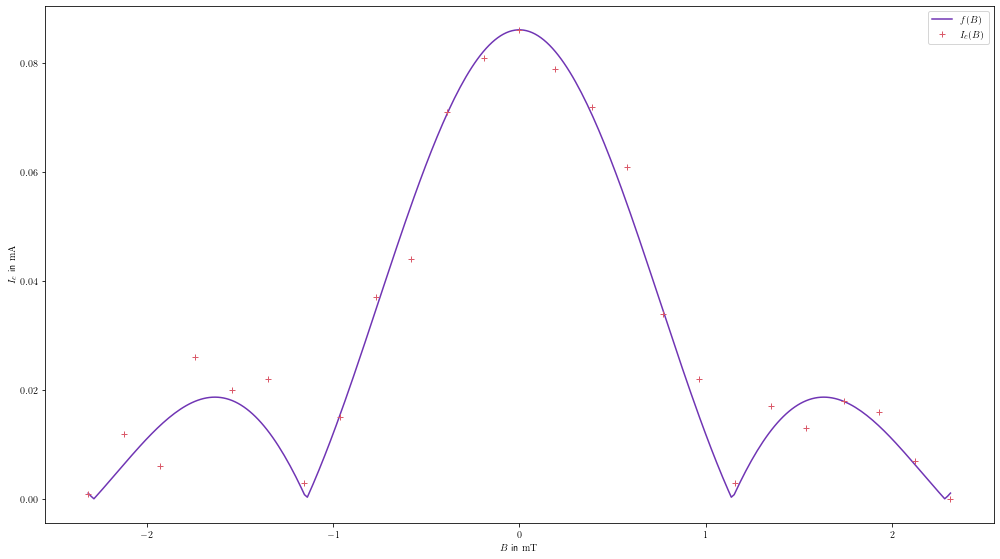

In [100]:
cm=1#/2.54
#for colmap in cmaps:
#cmap = mpl.cm.get_cmap(colmap)
fig, ax = plt.subplots(figsize=(14*cm,9*7*cm/8))

ax.set_xlabel(r'$B$ in $\si{\milli\tesla}$')
ax.set_ylabel(r'$I_c$ in $\si{\milli\ampere}$')
ax.plot(x, fit_sinc(x, *popt), color = cmap(1/8), label = r'$f(B)$', alpha=0.8)
ax.plot(B_values, i_c_real, '+', color = cmap(9/16), label = r'$I_c(B)$', alpha=1)
ax.legend(loc='best')
fig.subplots_adjust()
fig.tight_layout()
plt.savefig('plots/cm_1_test_Ic_of_B.pdf')
#plt.show()